# Data description


- Survived: 0 = Did not survive, 1 = Survived

- Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

- Sex: Male or female

- Age: Age in years, fractional if less than 1

- SibSp: Number of siblings or spouses aboard the titanic

- Parch: Number of parents or children aboard the titanic

- Ticket: Passenger ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

Survival probability is highest for location C and lowest for location S.

Is there a reason for this occurence? We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

In [4]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## Import and read data

In [23]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [6]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

In [8]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [9]:
# Missing data in training set

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
# Missing data in test set

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<Axes: >

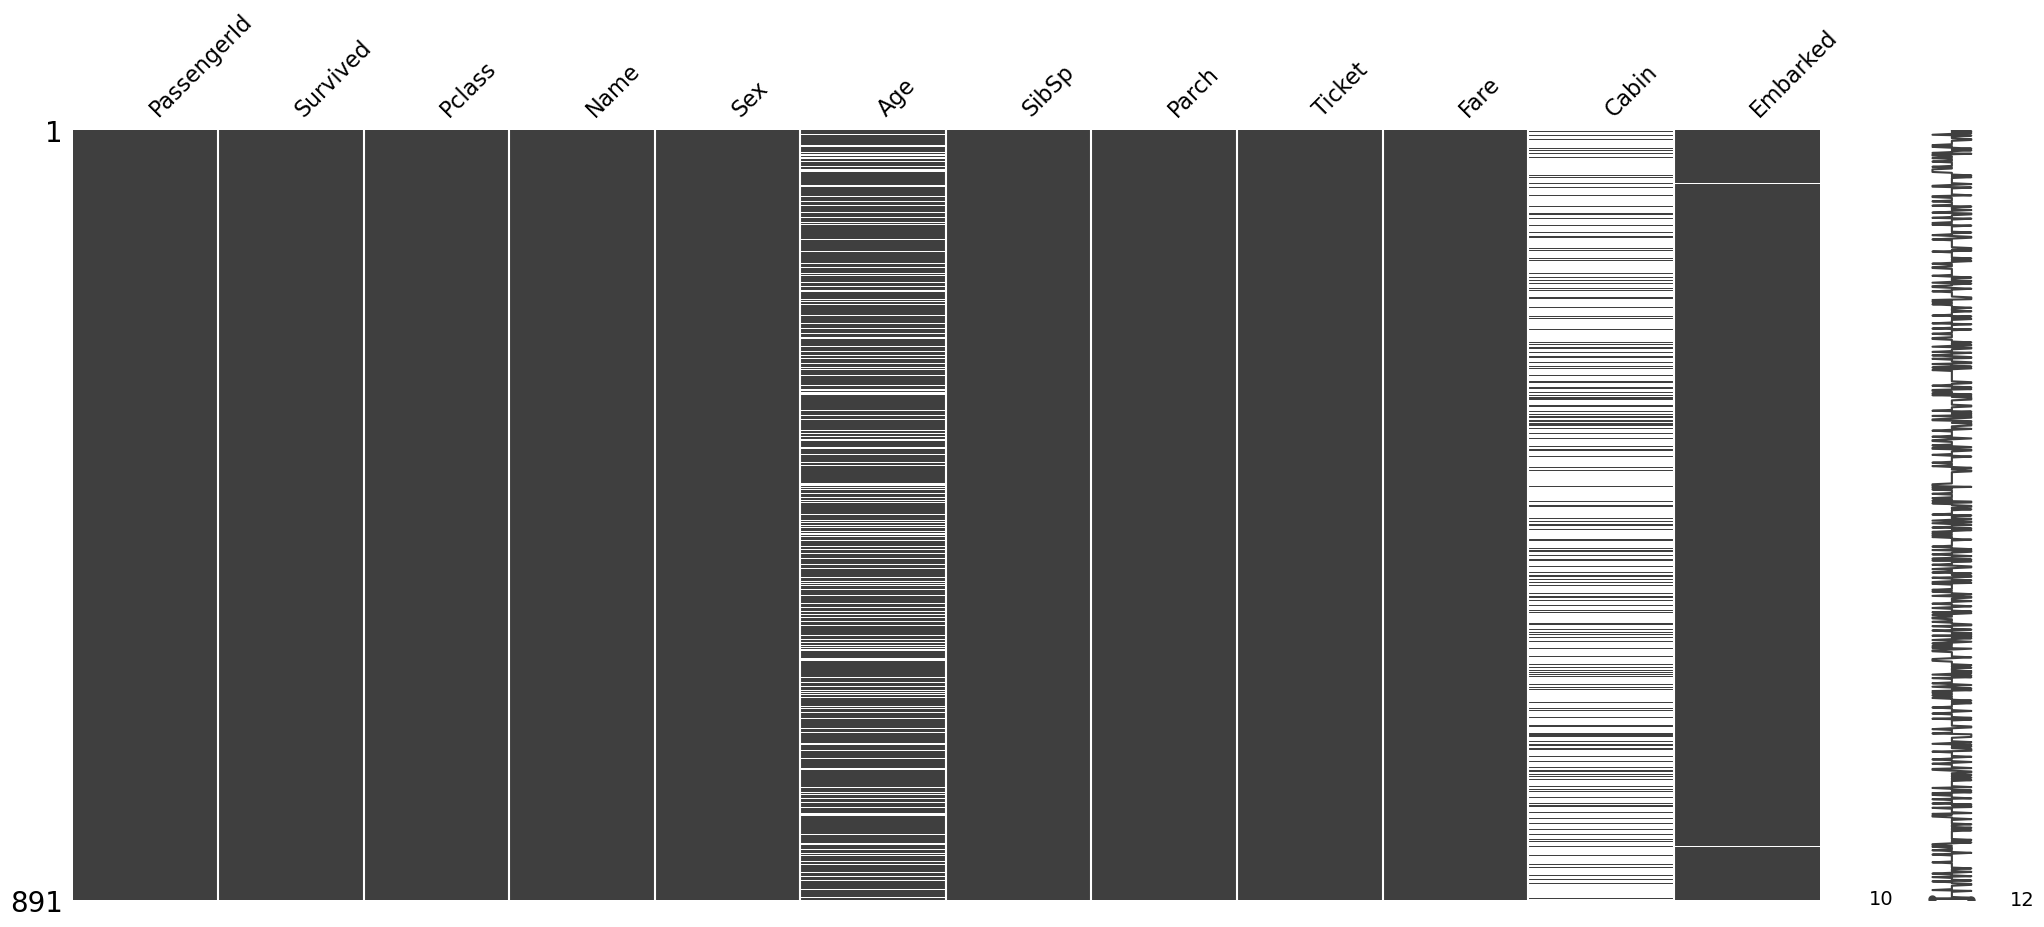

In [11]:
# Missing data in training set

missingno.matrix(train)

<Axes: >

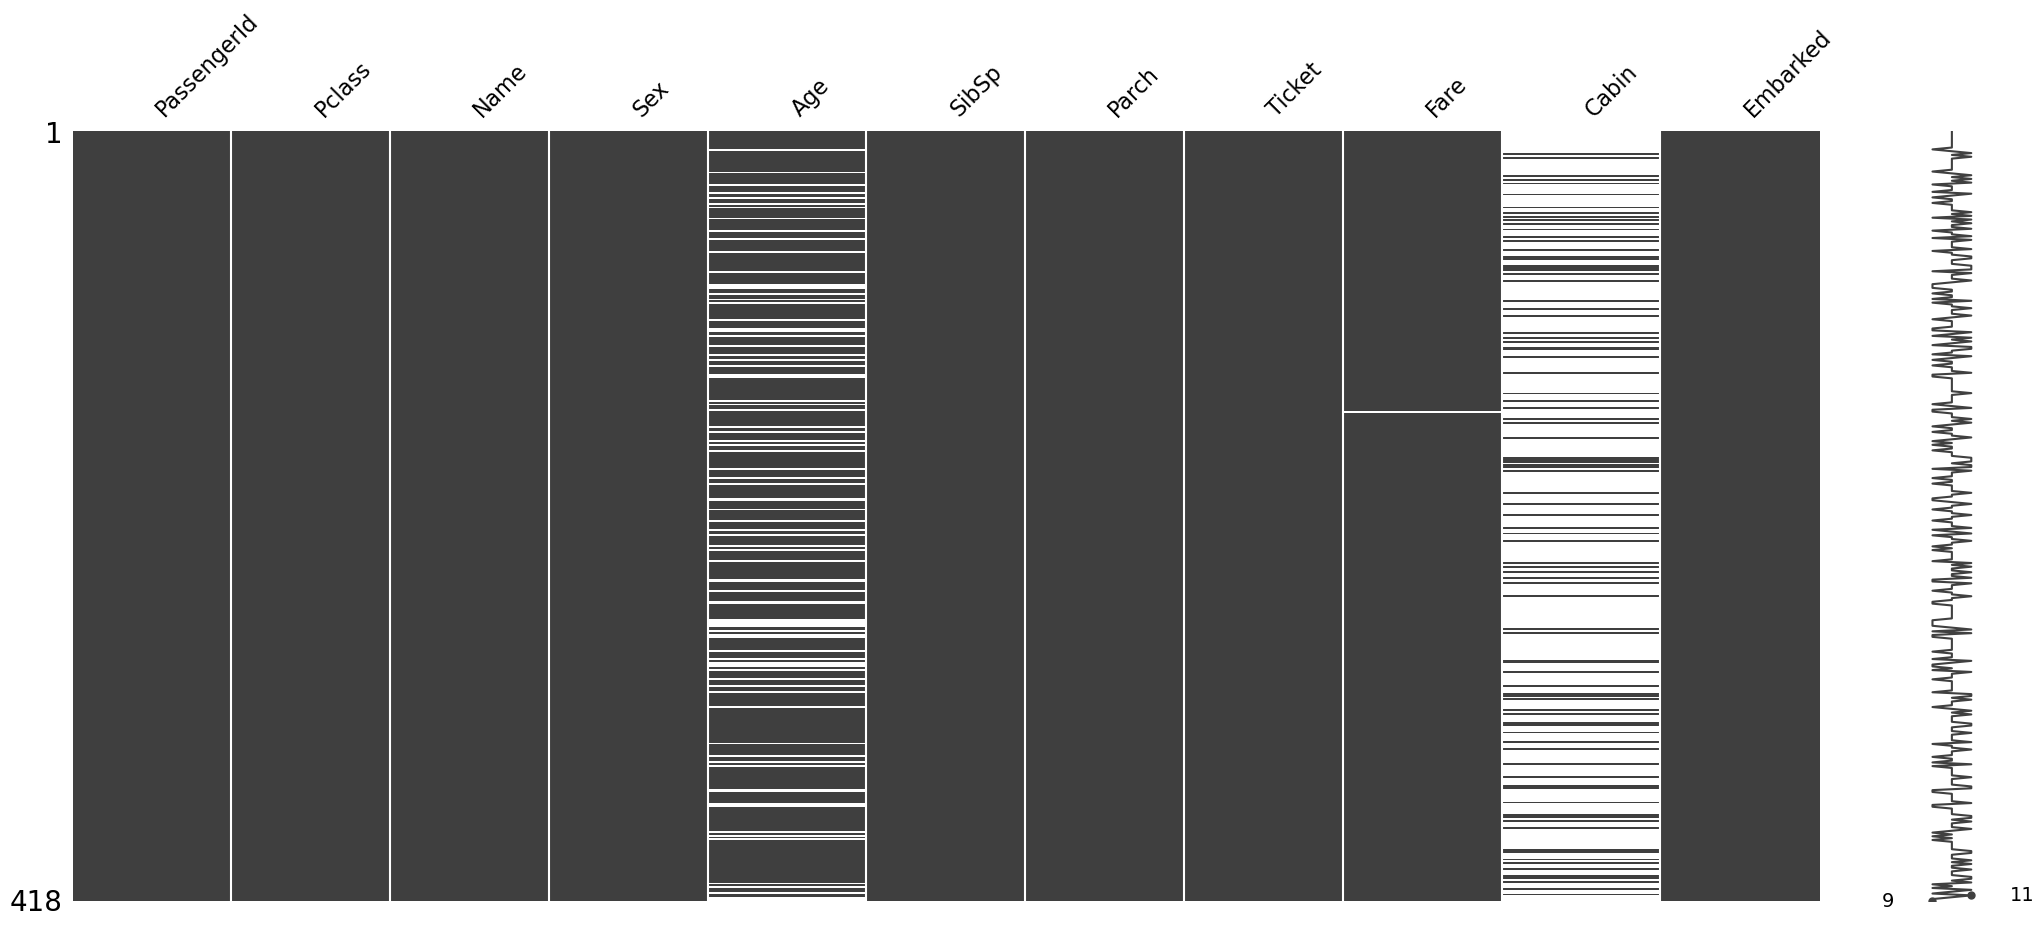

In [12]:
# Missing data in test set 

missingno.matrix(test)

# EDA

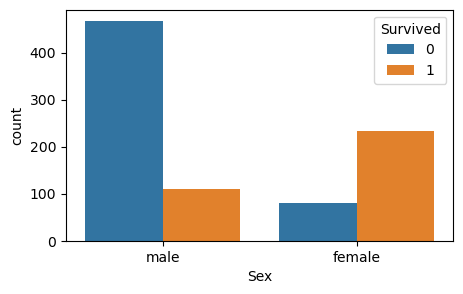

In [21]:
plt.figure(figsize=(5, 3))  # Set the width and height in inches
sns.countplot(x=train['Sex'],
hue=train['Survived'])
plt.show()

Text(0.5, 1.0, 'Survival Probability by Gender')

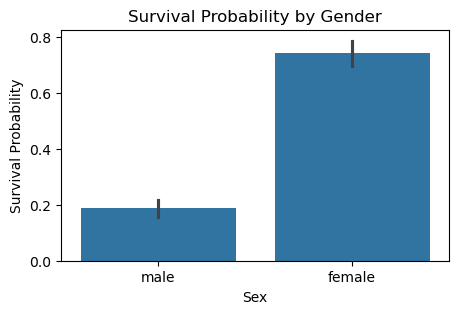

In [22]:
plt.figure(figsize=(5, 3))
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

## Categorical variable: Pclass

In [24]:
#dropna=False, it also includes counts for NaN (missing) values.

train['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

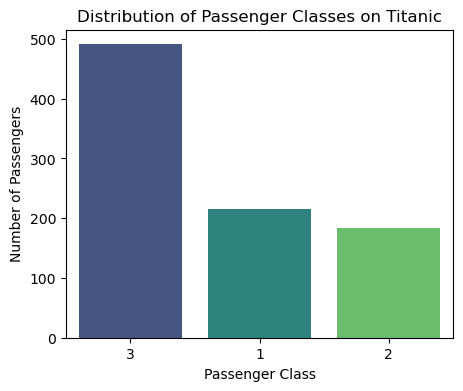

In [25]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Pclass', data=train,palette='viridis',order=[3, 1, 2])
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passenger Classes on Titanic')
plt.show()


In [26]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

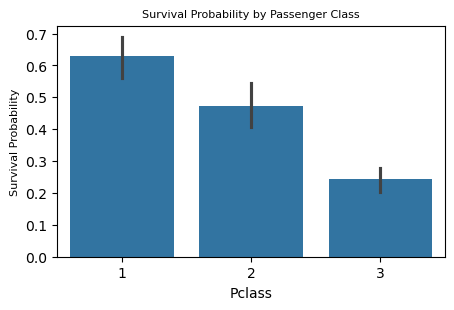

In [27]:
plt.figure(figsize=(5, 3))
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability',fontsize=8)
plt.title('Survival Probability by Passenger Class',fontsize=8)

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

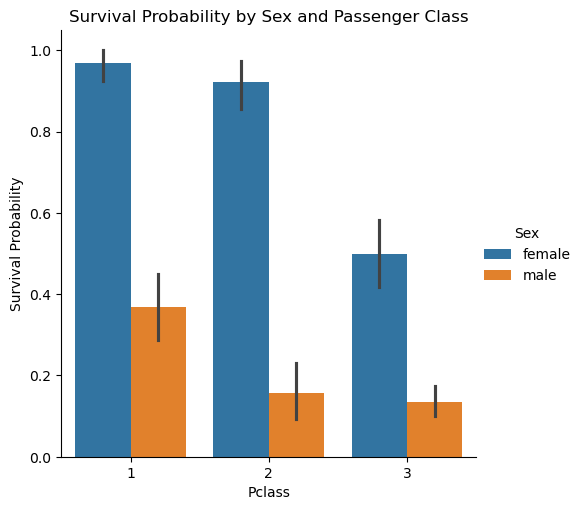

In [28]:
# Survival by gender and passenger class
g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
#g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

## Categorical variable: Embarked

In [29]:
train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [30]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


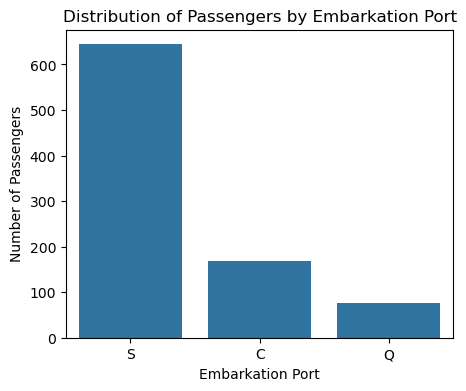

In [31]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Embarked', data=train)
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers by Embarkation Port')
plt.show()


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

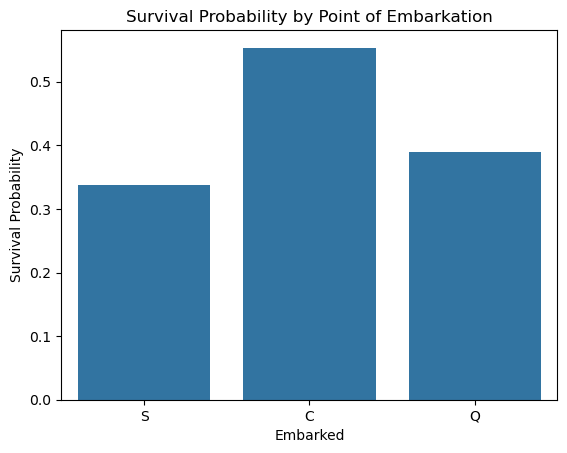

In [32]:
sns.barplot(x = 'Embarked', y ='Survived', data = train, ci=None)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest for location C and lowest for location S.

Is there a reason for this occurence? We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

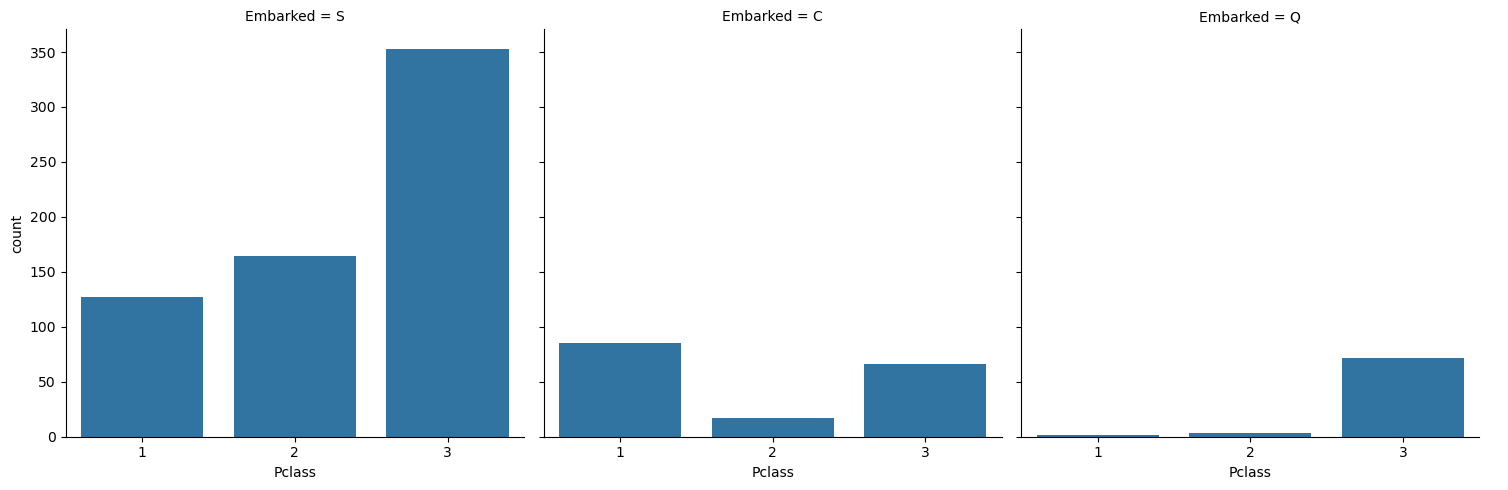

In [35]:
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count')

#sns.catplot(x='Pclass', hue='Survived', col='Embarked', data=train, kind='count')


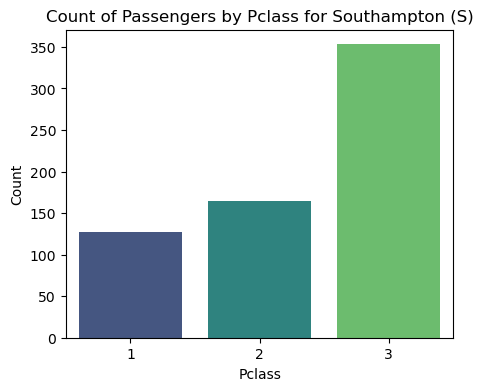

In [36]:
# Filter the dataset to include only passengers who embarked from Southampton (S)
southampton_passengers = train[train['Embarked'] == 'S']

# Create a count plot for passengers by class for Southampton
plt.figure(figsize=(5, 4))
sns.countplot(x='Pclass', data=southampton_passengers, palette='viridis')

# Labeling the plot
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Count of Passengers by Pclass for Southampton (S)')
plt.show()

In [37]:
# Check counts of passengers by class for Southampton
southampton_counts = southampton_passengers['Pclass'].value_counts()
print(southampton_counts)


Pclass
3    353
2    164
1    127
Name: count, dtype: int64


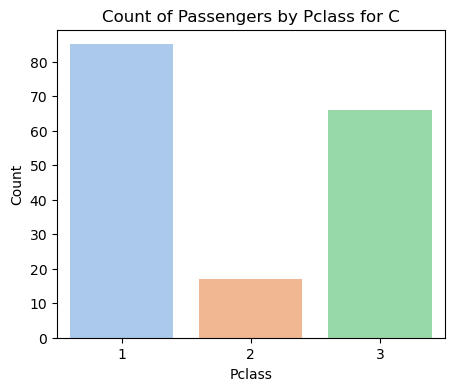

In [38]:
# Filter the dataset to include only passengers who embarked from C
C_passengers = train[train['Embarked'] == 'C']


plt.figure(figsize=(5, 4))
sns.countplot(x='Pclass', data=C_passengers, palette='pastel')

# Labeling the plot
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Count of Passengers by Pclass for C')
plt.show()

In [39]:
# Check counts of passengers by class for C
C_counts = C_passengers['Pclass'].value_counts()
print(C_counts)

Pclass
1    85
3    66
2    17
Name: count, dtype: int64


## Numerical variables

Numerical variables in our dataset are SibSp, Parch, Age and Fare.

## Numerical variables correlation with survival

<Axes: >

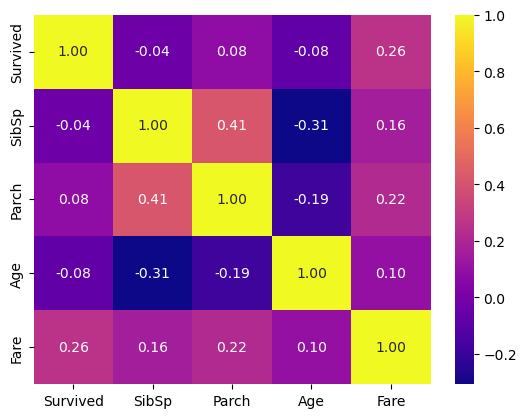

In [43]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'plasma')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

## Numerical variable: SibSp

In [44]:
# Distribution of the number of siblings or spouses aboard

train['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [45]:
# mean survival rates grouped by the number of siblings or spouses aboard (SibSp)

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

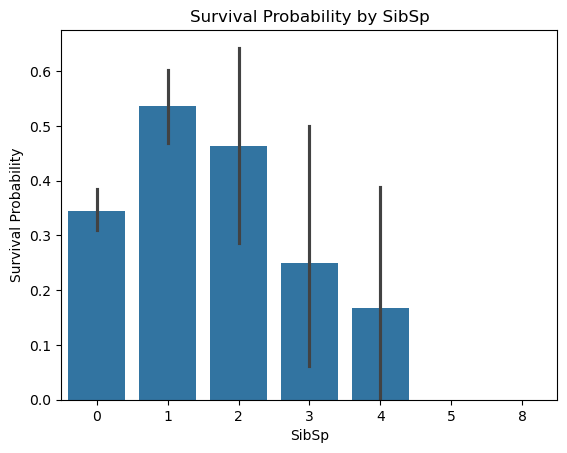

In [48]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

## Numerical variable: Parch

In [49]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [50]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

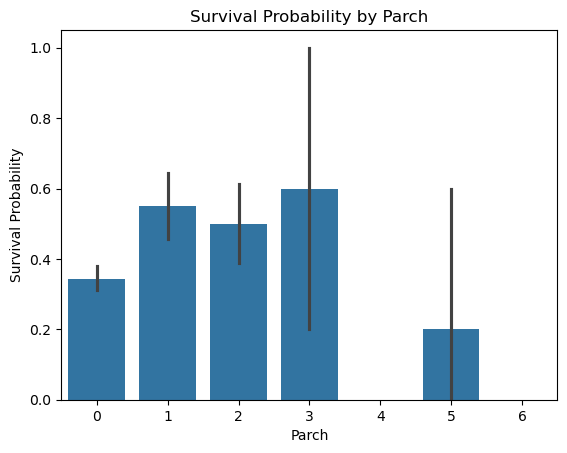

In [51]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

## Numerical variable: Age

In [52]:
# Null values in Age column 

train['Age'].isnull().sum()

177

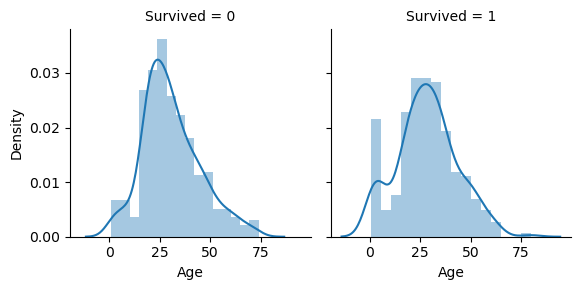

In [55]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')                          ## distplot is deprecated 

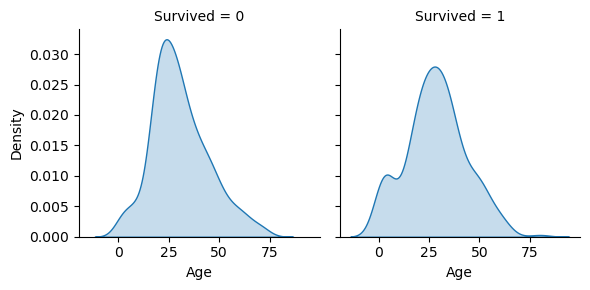

In [57]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.kdeplot, 'Age', fill=True)                        ## distplot is deprecated 

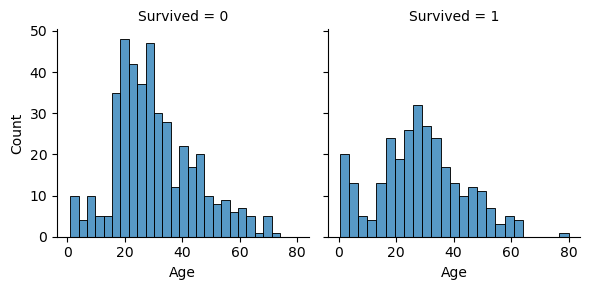

In [59]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.histplot, 'Age', bins=25)

## Numerical variable: Fare

In [60]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

# Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. 

- Drop and fill missing values
- Feature engineering
- Feature encoding

## Drop and fill missing values

In [61]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [62]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [63]:
# Compute the most frequent value of Embarked in training set ignoring any NaN values

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [64]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [65]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [66]:
# Compute median of Fare and Age in train set 

median_fare = train['Fare'].dropna().median()
print('Median fare of train set:',median_fare)


median_age = train['Age'].dropna().median()
print('Median age of train set:',median_age)

Median fare of train set: 14.4542
Median age of train set: 28.0


In [67]:
# Fill missing value in Fare and Age with median

test['Fare'].fillna(median_fare, inplace = True)
train['Age'].fillna(median_age, inplace = True)
test['Age'].fillna(median_age, inplace = True)

In [68]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [69]:
combine.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,8.0500,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,28.0,1,1,22.3583,C


In [71]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 102.4+ KB


In [72]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

We can ignore missing values in the Survived column because all of them are from the test set. Now we need to fill missing values in the Age column.

The goal is to use features that are most correlated with Age to predict the values for Age. But first, we need to convert Sex into numerical values where 0 = male and 1 = female. 

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

combine['Sex']= le.fit_transform(combine['Sex'])
combine['Embarked']= le.fit_transform(combine['Embarked'])
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


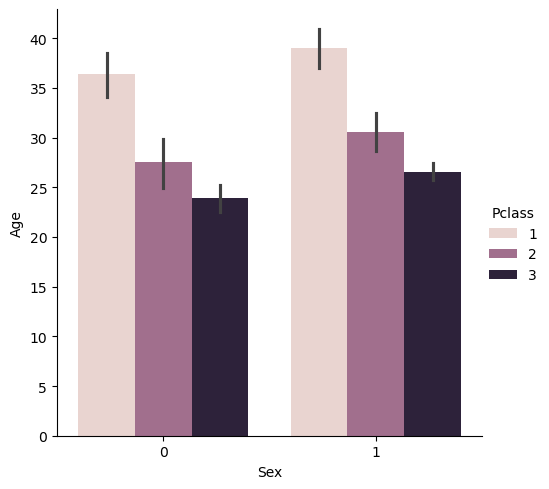

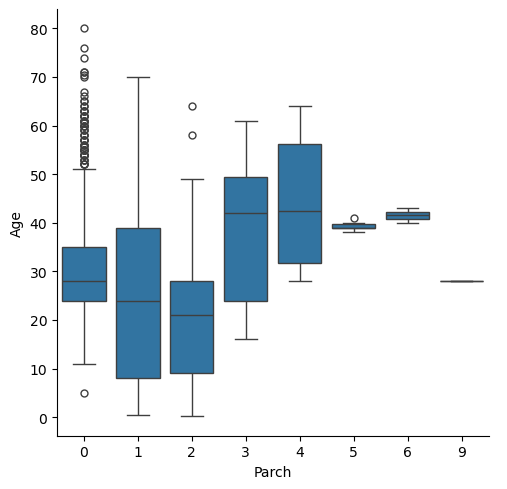

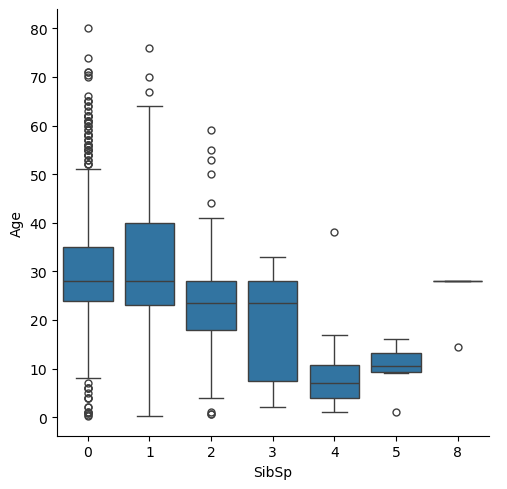

In [75]:
sns.catplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'bar', data = combine)
sns.catplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.catplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

### Make sure there are no missing values

In [ ]:
print(train.isnull().sum().sort_values(ascending = False))

print('-'*60)

print(test.isnull().sum().sort_values(ascending = False))

## Data split

In [ ]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [ ]:
print('Train shape:', train.shape)

print('Test shape:', test.shape)